In [47]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import open3d as o3d

In [48]:
# point cloud 파일이 들어있는 폴더 경로
pc_folder = "/media/rtlink/JetsonSSD-256/socap_dataset/pc/"

# imu 파일이 들어있는 폴더 경로
imu_folder = "/media/rtlink/JetsonSSD-256/socap_dataset/imu/"

In [49]:
# Surface Roughness, angular_velocity, linear_acceleration 값을 저장할 리스트 생성
roughness_list = []


In [50]:
# 포인트 클라우드 파일 순서대로 처리
for i, file in enumerate(sorted(os.listdir(pc_folder))):
    # point cloud 파일 읽기
    pcd_file = os.path.join(pc_folder, file)
    pcd = o3d.io.read_point_cloud(pcd_file)

    # Normal 벡터 추정
    pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.03, max_nn=30))

    # Moment of Inertia 계산
    cov = np.cov(np.asarray(pcd.points).T)
    evals, evecs = np.linalg.eigh(cov)
    radii = np.sqrt(evals)

    # Surface Roughness 계산
    center = np.asarray(pcd.get_center())
    roughness = 0
    for i in range(len(pcd.points)):
        point = np.asarray(pcd.points[i])
        vec = point - center
        dist = np.linalg.norm(np.dot(vec, evecs) / radii)
        roughness += dist
    roughness /= len(pcd.points)
    roughness_list.append(roughness)

In [51]:
angular_velocity_list = []
linear_acceleration_list = []

for i, file in enumerate(sorted(os.listdir(imu_folder))):
    # imu 파일 읽기
    imu_file = os.path.join(imu_folder, file)
    # print(imu_file)
    imu_data = pd.read_csv(imu_file)

    # angular_velocity 평균 계산
    angular_velocity_mean = imu_data[["angular_velocity_x", "angular_velocity_y", "angular_velocity_z"]].values
    angular_velocity_list.append(np.mean(angular_velocity_mean))
    # angular_velocity_list.append(angular_velocity_mean)
    # print(angular_velocity_list)

    # linear_acceleration 평균 계산
    linear_acceleration_mean = imu_data[["linear_acceleration_x", "linear_acceleration_y", "linear_acceleration_z"]].values
    # linear_acceleration_list.append(linear_acceleration_mean)
    linear_acceleration_list.append(np.mean(linear_acceleration_mean))
print(roughness_list)
print(angular_velocity_list)
print(linear_acceleration_list)

[1.5769581427391912, 1.588141182898189, 1.5750513043099408, 1.5785702030642026, 1.574106859256707, 1.573524143325927, 1.5745400400093796, 1.5741035723070655, 1.5729543648473128, 1.5741796787135494, 1.5722637799033135, 1.5736492205388615, 1.5744514905550664, 1.5772123045554707, 1.573715320774955, 1.5708594726605272, 1.5710915839010378, 1.5708407771185053, 1.578259818557073, 1.5705794792746697, 1.5725177530224683, 1.5738387715439015, 1.574648383593372, 1.5757691067010642, 1.5766480755313521, 1.5734095062395173, 1.573544357860921, 1.571259268904857, 1.5716345432758758, 1.572187866750912, 1.575763921331564, 1.5768455823407224, 1.574598812655162, 1.5779206907168348, 1.5731301114349001, 1.570970363190676, 1.5738368275524675, 1.5750290161804894, 1.5744890809139451, 1.5747221806830016, 1.5699447613225987, 1.5170248636238044, 1.557497357531605, 1.552901148876224, 1.571413988577461, 1.5657281601527198, 1.5480753777685052, 1.530239440241736, 1.5045884781281667, 1.5299855849398858, 1.5572494459536

In [60]:
arr = np.array(linear_acceleration_list)
print(arr.mean())

3.44952535992714


In [65]:
#linear_acceleration 적분
arr = arr - arr.mean()
arr_abs = np.abs(arr)
arr = arr / arr_abs.max()
arr = arr.cumsum()

In [ ]:
rough = np.array(roughness_list)
rough = rough - rough.mean()
rough_abs = np.abs(rough)
rough = rough / rough_abs.max()
rough = rough.cumsum()

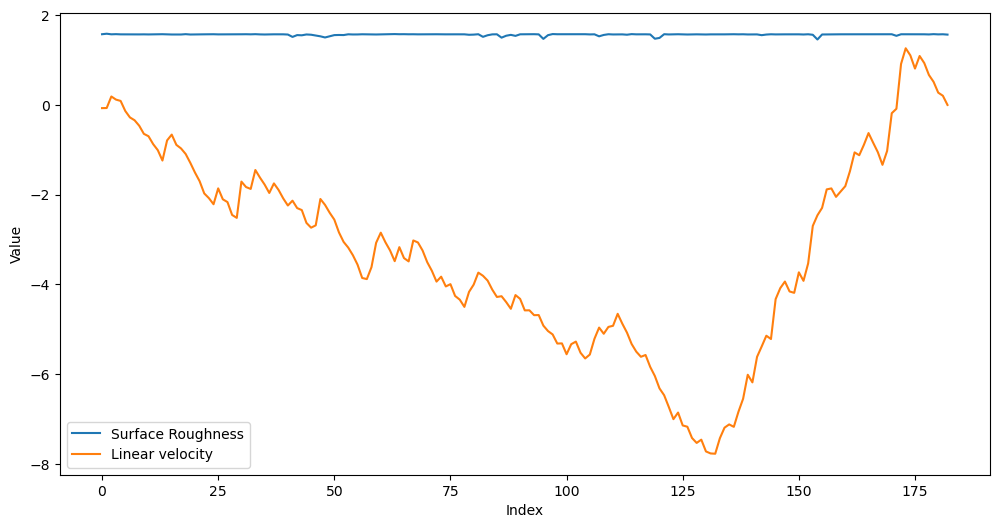

In [66]:
# Surface Roughness, angular_velocity, linear_acceleration 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(roughness_list, label="Surface Roughness")
# ax.plot(angular_velocity_list, label="Angular Velocity")
# ax.plot(linear_acceleration_list, label="Linear Acceleration")
ax.plot(arr, label="Linear velocity")


ax.set_xlabel("Index")
ax.set_ylabel("Value")

ax.legend()
plt.show()

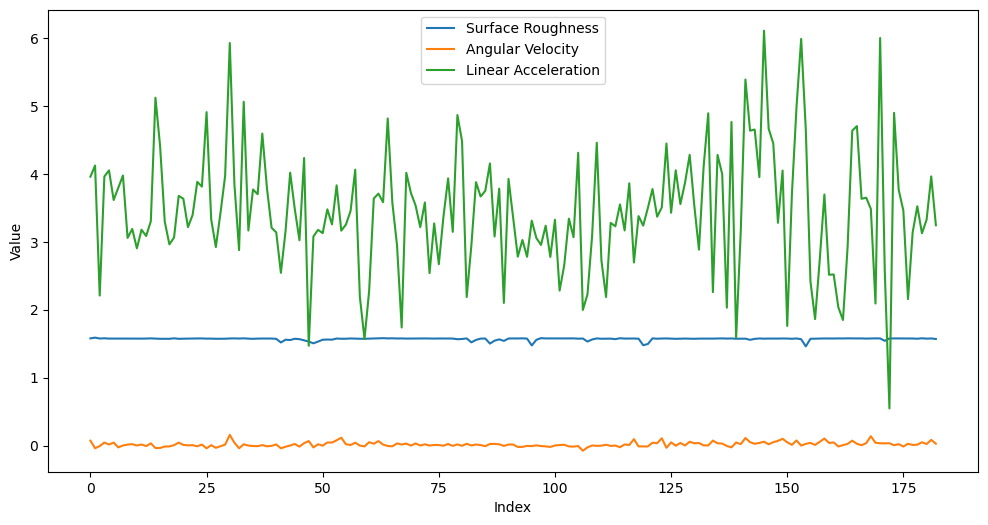

In [37]:
# Surface Roughness, angular_velocity, linear_acceleration 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(roughness_list, label="Surface Roughness")
ax.plot(angular_velocity_list, label="Angular Velocity")
ax.plot(linear_acceleration_list, label="Linear Acceleration")

ax.set_xlabel("Index")
ax.set_ylabel("Value")

ax.legend()
plt.show()

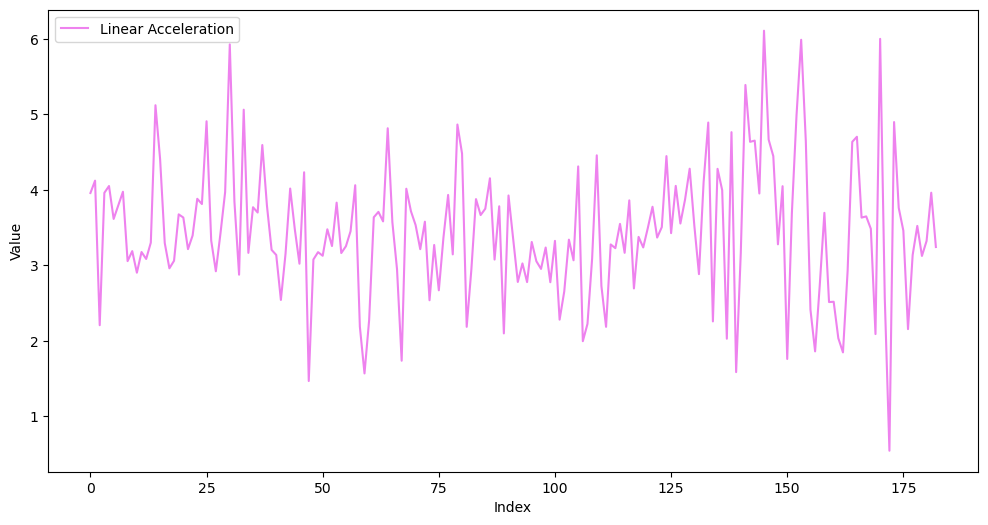

In [45]:
# Surface Roughness, angular_velocity, linear_acceleration 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

# ax.plot(roughness_list, label="Surface Roughness")
# ax.plot(angular_velocity_list, label="Angular Velocity", color = 'limegreen')
ax.plot(linear_acceleration_list, label="Linear Acceleration", color = 'violet')

ax.set_xlabel("Index")
ax.set_ylabel("Value")

ax.legend()
plt.show()

NameError: name 'df' is not defined

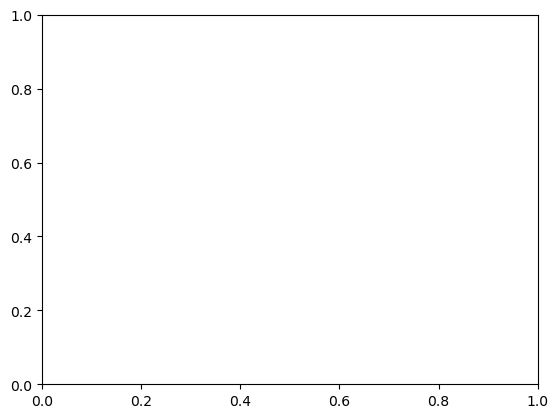

In [40]:
# 그래프 그리기
fig, ax = plt.subplots()

# 데이터프레임에서 열의 최대 및 최소값 계산하기
roughness_max = df['surface roughness'].max()
roughness_min = df['surface roughness'].min()
angular_velocity_max = df['angular_velocity'].max()
angular_velocity_min = df['angular_velocity'].min()
linear_acceleration_max = df['linear_acceleration'].max()
linear_acceleration_min = df['linear_acceleration'].min()

# y축 범위 설정하기
ax.set_ylim([min(roughness_min, angular_velocity_min, linear_acceleration_min), max(roughness_max, angular_velocity_max, linear_acceleration_max)])

# 그래프 그리기
ax.plot(ax=ax)

# 결과 출력
plt.show()